# Convolutional Neural Network for Classification of Breast Cancer Cells

### **Authors**: Aaron Cherry

## Overview

The purpose of this study is to train a Convolutional Neural Network to identify and classify cancerous cells in H&E-stained needle biopsy images. The aim is to deploy a web application that functions to analyze user provided images and give confidence metrics regarding the presence of cancerous tissues in the image.

## Business Problem

> Around the world, breast cancer annually affects about 1.7 million women. Compared to other
types of cancer, it is the highest recurrent cause of death. Based on collected data by the American
Cancer Society, approximately 268,600 new cases were diagnosed as invasive breast cancer patients
in 2019. In the same year, there were approximately 62,930 new cases of in-situ breast cancer identified,
with roughly 41,760 expected death cases due to breast cancer. Early diagnosis of breast cancer is
significant as a means to boost the number of survivors. The high cost of breast cancer diagnosis and
high morbidity have motivated researchers to explore solutions to develop more precise models for
cancer diagnosis.
~ Alzubaidi et. al. electronics

Invasive Ductal Carcinoma is one of the most common types of breast cancer.

They go on to explain that the screening and testing process for breast cancer is a long and expensive one. A process that can be augmented, facilitated, and made more cost effective by the introduction of Machine Learning and deep neural network models. The impaortance of machine learning models is reflected in the types of models built and the teams working on the issue such a Google, MIT, and international cooperative efforts like this one. But, to get an idea of how the models are trained on the data we have to get an idea of what the data set looks like and most importantly, the classes of cancer needed to be identified.

Multiple models have been tested to solve the specific problem of identifying cancerous cells in stained biopsy images. These models include [AlexNet](https://en.wikipedia.org/wiki/AlexNet), [GoogleNet](https://towardsdatascience.com/deep-learning-googlenet-explained-de8861c82765), [ResNet](https://arxiv.org/abs/1512.03385), and [DenseNet](https://arxiv.org/abs/1608.06993). Although there have been many different effort in research on this specific problem, there are still barriers to deploying working modles in the field. 

## Data Understanding

The data used in this study comes from Kaggle and can be found [here](https://www.kaggle.com/paultimothymooney/breast-histopathology-images). The data consisits of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. The images were then split into 50x50 pixel patches giving 277,524 patches in total. The patches are classified as '0' for IDC-negative and '1' for IDC-positive.

> Each patch’s file name is of the format: uxXyYclassC.png — > example 10253idx5x1351y1101class0.png . Where u is the patient ID (10253idx5), X is the x-coordinate of where this patch was cropped from, Y is the y-coordinate of where this patch was cropped from, and C indicates the class where 0 is non-IDC and 1 is IDC.
~ Kaggle Source

In [ ]:
!pip install opencv-python

### Loading in the full data set with glob library

In [1]:
#Loading in applicable libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os, shutil
from glob import glob


print(os.listdir("../input"))

['breast-histopathology-images']


### Loading in the data

In [2]:
from glob import glob
data = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)

In [3]:
# Checking to see if all of the data is accounted for
len(data)

277524

In [4]:
# Separating the IDC-positive and IDC-negative images
class0 = []
class1 = []
for datum in data:
    if datum.endswith('class0.png'):
        class0.append((datum.replace(os.path.basename(datum),''),os.path.basename(datum)))
    else:
        class1.append((datum.replace(os.path.basename(datum),''),os.path.basename(datum)))

In [5]:
print("There are {} files marked as IDC-negative.".format(len(class0)))
print("There are {} files marked as IDC-positive.".format(len(class1)))


There are 198738 files marked as IDC-negative.
There are 78786 files marked as IDC-positive.


In [6]:
# Setting up the directory system for copying over files
data_dir = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/'
new_dir = 'split/'


In [7]:
# Making the new split directory in the output
os.mkdir(new_dir)

In [8]:
train_folder = os.path.join('./split', 'train')
train_pos  = os.path.join(train_folder, 'positive')
train_neg = os.path.join(train_folder, 'negative')

test_folder = os.path.join('./split', 'test')
test_pos  = os.path.join(test_folder, 'positive')
test_neg = os.path.join(test_folder, 'negative')

val_folder = os.path.join('./split', 'validation')
val_pos  = os.path.join(val_folder, 'positive')
val_neg = os.path.join(val_folder, 'negative')

In [9]:
os.mkdir(test_folder)
os.mkdir(test_pos)
os.mkdir(test_neg)

os.mkdir(train_folder)
os.mkdir(train_pos)
os.mkdir(train_neg)

os.mkdir(val_folder)
os.mkdir(val_pos)
os.mkdir(val_neg)

### Splitting the IDC-Positive data into train,test,validation sets

|Set|% split|N-files|
|:------:|:--------:|:--------:|
|train|60|47277|
|validation|20|15752| 
|test|20|15757|


The following code will split the data and separate it accordingly in the new directory.

In [10]:
# train IDC-positive
imgs = class1[:47277]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(train_pos, img[1])
    shutil.copyfile(origin, destination)

In [11]:
# validation IDC-positive
imgs = class1[47277:63029]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(val_pos, img[1])
    shutil.copyfile(origin, destination)

In [12]:
# test IDC-positive
imgs = class1[63029:]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(test_pos, img[1])
    shutil.copyfile(origin, destination)

### Doing the same thing for the IDC-negative images 

|Set|% split|N-files|
|:------:|:--------:|:--------:|
|train|60|119,243|
|test|20|39,747|
|validation|20|39,748| 

The following code will split the data and separate it accordingly in the new directory.

In [13]:
# train IDC-negative
imgs = class0[:119243]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(train_neg, img[1])
    shutil.copyfile(origin, destination)

In [14]:
# test IDC-negative
imgs = class0[119243:158990]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(test_neg, img[1])
    shutil.copyfile(origin, destination)

In [15]:
# validation IDC-negative
imgs = class0[158990:]
for img in imgs:
    origin = os.path.join(img[0], img[1])
    destination = os.path.join(val_neg, img[1])
    shutil.copyfile(origin, destination)

Looking at the amount of data in each folder to make sure all of it is accounted for and that each set has the same ratio of neg/pos images.

In [16]:
print('There are', len(os.listdir(train_pos)), 'IDC-positive images in the training set.')
print('There are', len(os.listdir(train_neg)), 'IDC-negative images in the training set.\n')

print('There are', len(os.listdir(val_pos)), 'IDC-positive images in the validation set.')
print('There are', len(os.listdir(val_neg)), 'IDC-negative images in the validation set.\n')

print('There are', len(os.listdir(test_pos)), 'IDC-positive images in the test set.')
print('There are', len(os.listdir(test_neg)), 'IDC-negative images in the test set.\n')

There are 47277 IDC-positive images in the training set.
There are 119243 IDC-negative images in the training set.

There are 15752 IDC-positive images in the validation set.
There are 39748 IDC-negative images in the validation set.

There are 15757 IDC-positive images in the test set.
There are 39747 IDC-negative images in the test set.



In [17]:
print('There are', len(os.listdir(train_neg))+len(os.listdir(train_pos)), 'IDC-negative images in the training set')
print('There are', len(os.listdir(val_neg))+len(os.listdir(val_pos)), 'IDC-negative images in the validation set')
print('There are', len(os.listdir(test_neg))+len(os.listdir(test_pos)), 'IDC-negative images in the test set')

There are 166520 IDC-negative images in the training set
There are 55500 IDC-negative images in the validation set
There are 55504 IDC-negative images in the test set


## Exploritory Data Analysis

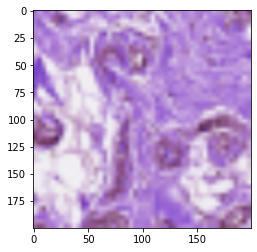

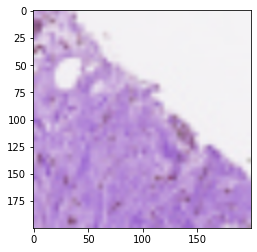

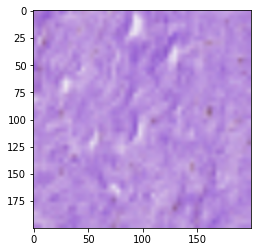

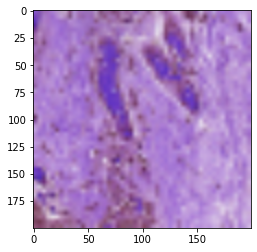

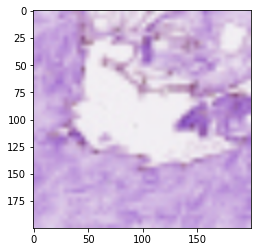

In [18]:
import cv2
# Look as a sample of the images to get an idea of what the cells look like
# TODO: give an examples of images with and without cancer cells and label them

for i in class0[:5]:
    img = cv2.imread(os.path.join(i[0],i[1]))
    img_1 = cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

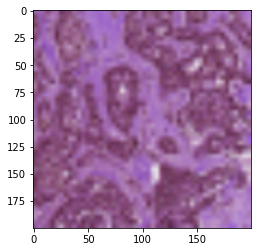

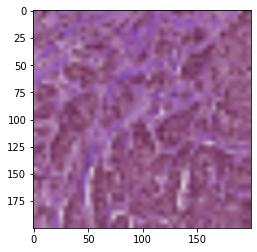

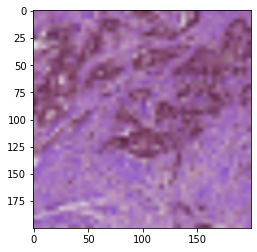

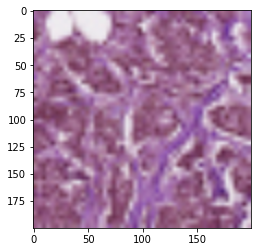

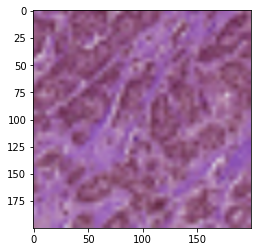

In [19]:
for i in class1[:5]:
    img = cv2.imread(os.path.join(i[0],i[1]))
    img_1 = cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

Some of the images are of the edge of the tissue with quite a bit of white space, this might throw off the model training and predictions but for now we'll keep these images in as most whole slide images will have the white background.

### Looking at the pixel distributions.

In [21]:
im.mean(axis=2).flatten()

array([158.33333333, 190.33333333, 165.33333333, ..., 165.        ,
       189.33333333, 199.66666667])

In [24]:
vals = np.empty(1)

im = cv2.imread(os.path.join(class0[0][0],class0[0][1]))
vals += im.mean(axis=2).flatten()

# im = cv2.imread('image.jpg')
# calculate mean value from RGB channels and flatten to 1D array

# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (2500,)

In [14]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2

# Grab a subsample of the images to conserve memory on limited systems
def subsample_images(data, sample_size=1000, test_size=None, random_state=None):
    '''
    This function takes a subsample of the data and separates the images with thier labels. The images are resized to 100x100 pixels for better analysis.
    
    Parameters
    ----------
    data: list-like,
    List of image data with .png format.
    
    sample_size: int, default 1000
    User-defined number of samples to take from the data set.
    
    test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

    random_state : int, RandomState instance or None, default=None
    Controls the shuffling applied to the data before applying the split.
    Pass an int for reproducible output across multiple function calls.
    See :term:`Glossary <random_state>`.
    
    Returns
    -------
    splitting : list, length=2 * len(arrays)
        List containing train-test split of inputs.
    '''
    images=[]
    labels=[]
    try:
        for i in data[:sample_size]:
            if i.endswith('.png'):
                label=i[-5]

                # read in the image
                img=cv2.imread(i)

                # resize the image to 100x100 pixels
                img_1=cv2.resize(img,(100,100))

                # append the resized image and its respective label to images,labels
                images.append(img_1)
                labels.append(label)

        # stack the images into ____ type
        x = np.stack(images)
        
        # Normalizing the data
        x=x/255
        
        # convert class values to a binary class matrix
        y = to_categorical(labels)

        # conduct the train test split of the data with the user-defined random state and test size
        return train_test_split(x,y,random_state=random_state,test_size=test_size)

    except:
        print("No Data or the data is not in the correct format.")
        return 0
x_test,x_train,y_test,y_train = subsample_images(data,20000)

No Data or the data is not in the correct format.


TypeError: cannot unpack non-iterable int object

## Modeling

In [4]:
# Importing all relevant packages for modeling in keras
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Import packages for showing the performance metrics
from sklearn.metrics import confusion_matrix

# Setting the random seed for reproducability
np.random.seed(123)

### Setting up the Image Data Flow

In [9]:
# set up batch generator for train set with 1000 as the batch size
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(100, 100), 
        batch_size = 100)

# set up batch generator for test set with 1000 as the batch size
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(100, 100), 
        batch_size = 100) 

# set up batch generator for validation set with 1000 as the batch size
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(100, 100), 
        batch_size = 100)


Found 94554 images belonging to 2 classes.
Found 31514 images belonging to 2 classes.
Found 31504 images belonging to 2 classes.


In [28]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Functions for various models to try

In [11]:
def first_simple():

    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))    
    
    opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
    
    print(model.summary())
    return model
    
def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(2, activation = "sigmoid"))
    
    opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
    
    print(model.summary())
    return model



In [12]:
# set the model as the first simple model
model = first_simple()

# Fit the model to the train data
history = model.fit(train_images,
                    train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val_images,val_labels))#

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [15]:
# Test results of the Model on train data
loss_train,accuracy_train = model.evaluate(train_images, train_labels)
print('Model has an accuracy of {} with a loss of {} on the train subset.'.format(accuracy_train,loss_train ))

313/313 [==============================] - 1s 5ms/step - loss: 0.3708 - acc: 0.8406
Model has an accuracy of 0.8406000137329102 with a loss of 0.3707709312438965 on the train subset.


In [16]:
# Test results of the Model on test data
loss_test,accuracy_test = model.evaluate(test_images, test_labels)
print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))

157/157 [==============================] - 1s 4ms/step - loss: 0.4099 - acc: 0.8226
Model has an accuracy of 0.8226000070571899 with a loss of 0.4098512828350067 on the test subset.


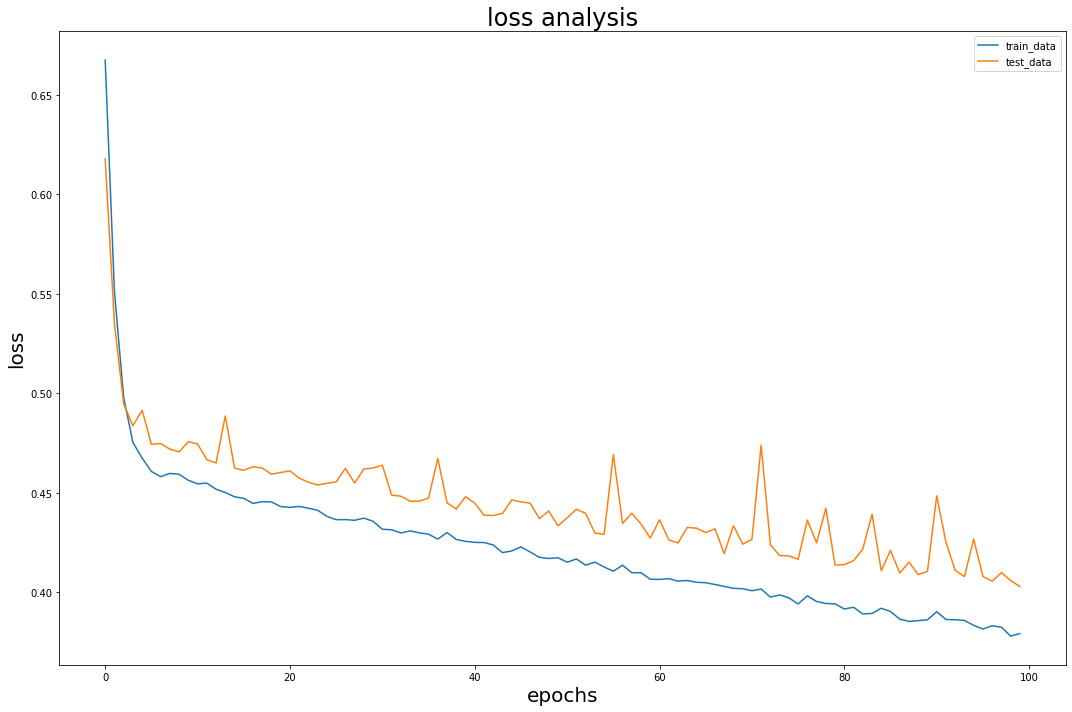

In [17]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs', size = 20)
ax.set_ylabel('loss', size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('loss analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_loss.png')

plt.show()

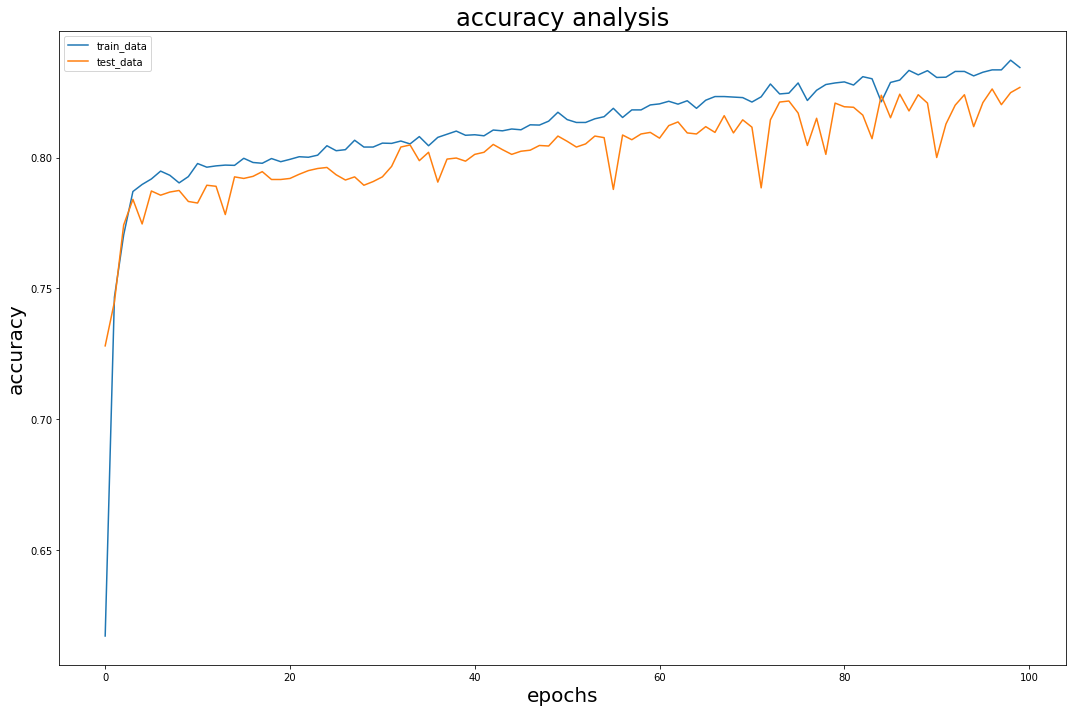

In [18]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_xlabel('epochs',size = 20)
ax.set_ylabel('accuracy',size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('accuracy analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_acc.png')
plt.show()

In [29]:
y_predicts = np.argmax(model.predict(test_images),axis=1)
y_labels  = np.argmax(test_labels,axis=1)

In [35]:
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

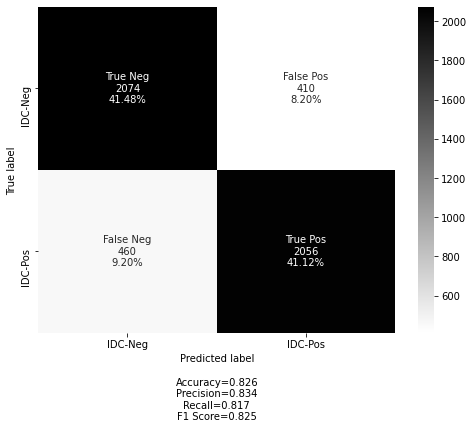

In [50]:
cf_matrix = confusion_matrix(y_labels,y_predicts)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['IDC-Neg', 'IDC-Pos']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                      figsize=(8,6))

## EfficientNet B0 test metrics

In [52]:
# set the model as the first simple model
enb0 = modelEfficientNetB0()

# Fit the model to the train data
history = enb0.fit(train_images,
                    train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_data=(val_images,val_labels))#

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 4, 4, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2562      
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________
None
Epoch 1/100
313/313 [==============================] - 35s 85ms/step - loss: 0.6419 - acc: 0.6430 - val_loss: 0.7976 - val_acc: 0.4998
Epoch 2/100
313/313 [==============================] - 24s 77ms/step - loss: 0.4773 - acc: 0.7883 - val_loss: 0.8520 - val_acc: 0.4266
Epoch 3/100
313/313 [==============================] - 24s 78ms/step - loss: 0.4331 - acc: 0.8

### Test Metrics

In [53]:
# Test results of the Model on train data 
loss_train,accuracy_train = enb0.evaluate(train_images, train_labels)
print('Model has an accuracy of {} with a loss of {} on the train subset.'.format(accuracy_train,loss_train ))

313/313 [==============================] - 5s 15ms/step - loss: 0.0713 - acc: 0.9756
Model has an accuracy of 0.975600004196167 with a loss of 0.07126259058713913 on the train subset.


In [54]:
# Test results of the Model on test data
loss_test,accuracy_test = enb0.evaluate(test_images, test_labels)
print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))

157/157 [==============================] - 2s 15ms/step - loss: 0.7810 - acc: 0.8298
Model has an accuracy of 0.829800009727478 with a loss of 0.7810204029083252 on the test subset.


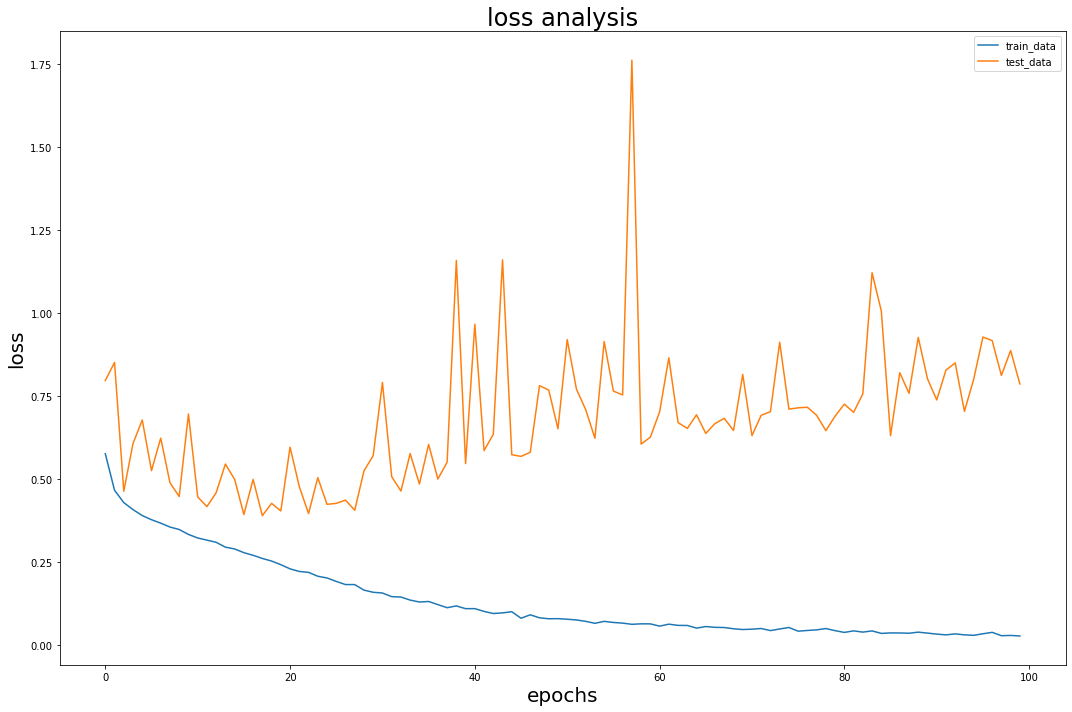

In [55]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs', size = 20)
ax.set_ylabel('loss', size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('loss analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_loss.png')

plt.show()

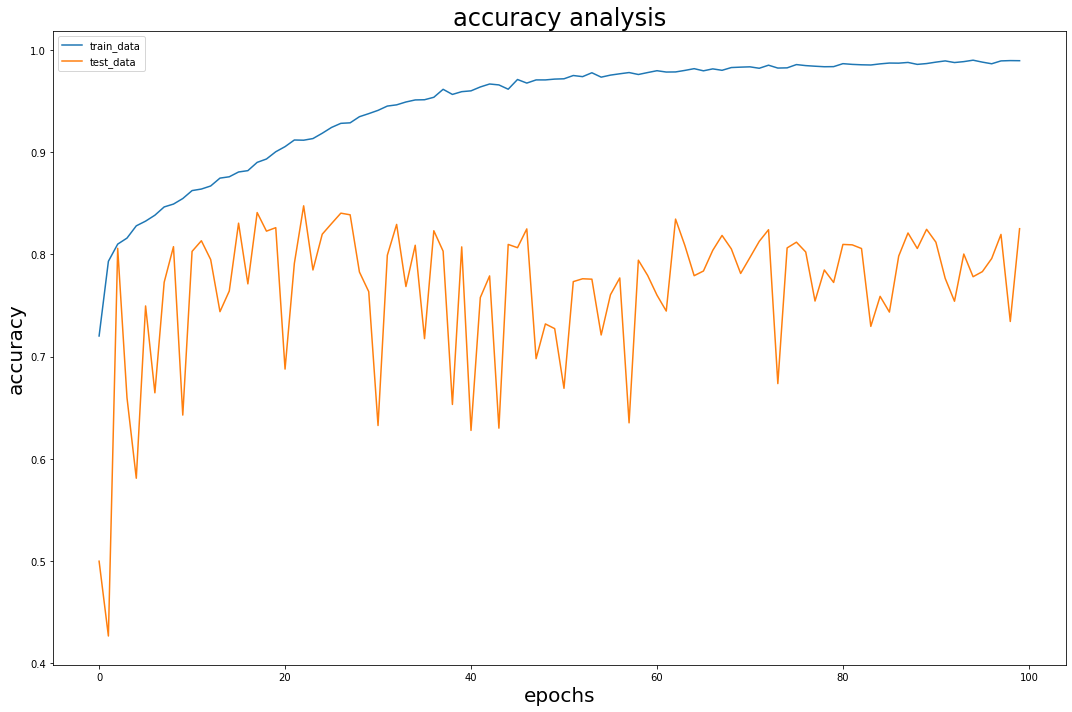

In [56]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_xlabel('epochs',size = 20)
ax.set_ylabel('accuracy',size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('accuracy analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_acc.png')
plt.show()

In [57]:
y_predicts = np.argmax(enb0.predict(test_images),axis=1)
y_labels  = np.argmax(test_labels,axis=1)

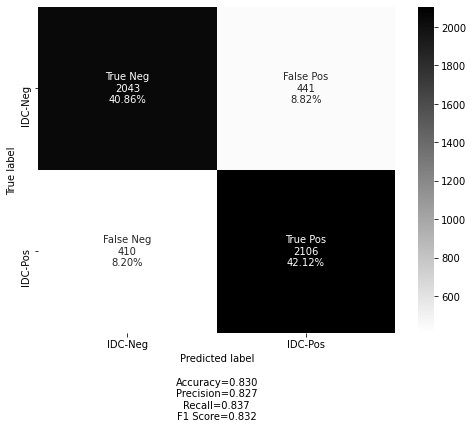

In [58]:
cf_matrix = confusion_matrix(y_labels,y_predicts)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['IDC-Neg', 'IDC-Pos']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                      figsize=(8,6))